## ***Importing Data***

In [226]:
import pandas as pd

Wines = pd.read_csv("White Wine.csv", sep = ";", header = 0)
Wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# ***EDA (Exploratory Data Analysis)***

## *Functions*

In [227]:
def convert_dataframe_variables(data, var_names, to_type='character'):
    data =pd.DataFrame(data)
    df = data.copy()

    conversion_functions = {
        'integer': int,
        'logical': bool,
        'numeric': float,
        'character': str,
        'ordered': lambda x: pd.Categorical(x, ordered=True),
        'factor': lambda x: pd.Categorical(x)
        }

    conversion_function = conversion_functions.get(to_type)

    if conversion_function is None:
        raise ValueError('Invalid data type specified!')
    
    for var_name in var_names:
        df[var_name] = df[var_name].map(conversion_function)
    
    return df

In [228]:
Wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


We can see that, our target (Quality) is an integer. Let's change it to a string, because when we get to the prediction we want the model to predict an exact result and not a decimal one, so in training, we havo to train the model that the wine can onlybe be of quality 3 and not 3.1, 3.2, etc.

In [229]:
Wines = convert_dataframe_variables(Wines, ['quality'], to_type='character')

In [230]:
Wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   object 
dtypes: float64(11), object(1)
memory usage: 459.3+ KB


## *Checking Missing Values*

In [231]:
Wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## *Statistics*

In [232]:
Wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [233]:
Target = Wines.quality.values
Wines.drop('quality', axis='columns', inplace=True)

Here we remove our target variable (quality) from the dataset and save it in a variable.

## *Checking Outliers*

{'whiskers': [<matplotlib.lines.Line2D at 0x1df38c965f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df38c97100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df38c95ba0>,
 'medians': [<matplotlib.lines.Line2D at 0x1df38c97c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1df38c80310>,
 'means': []}

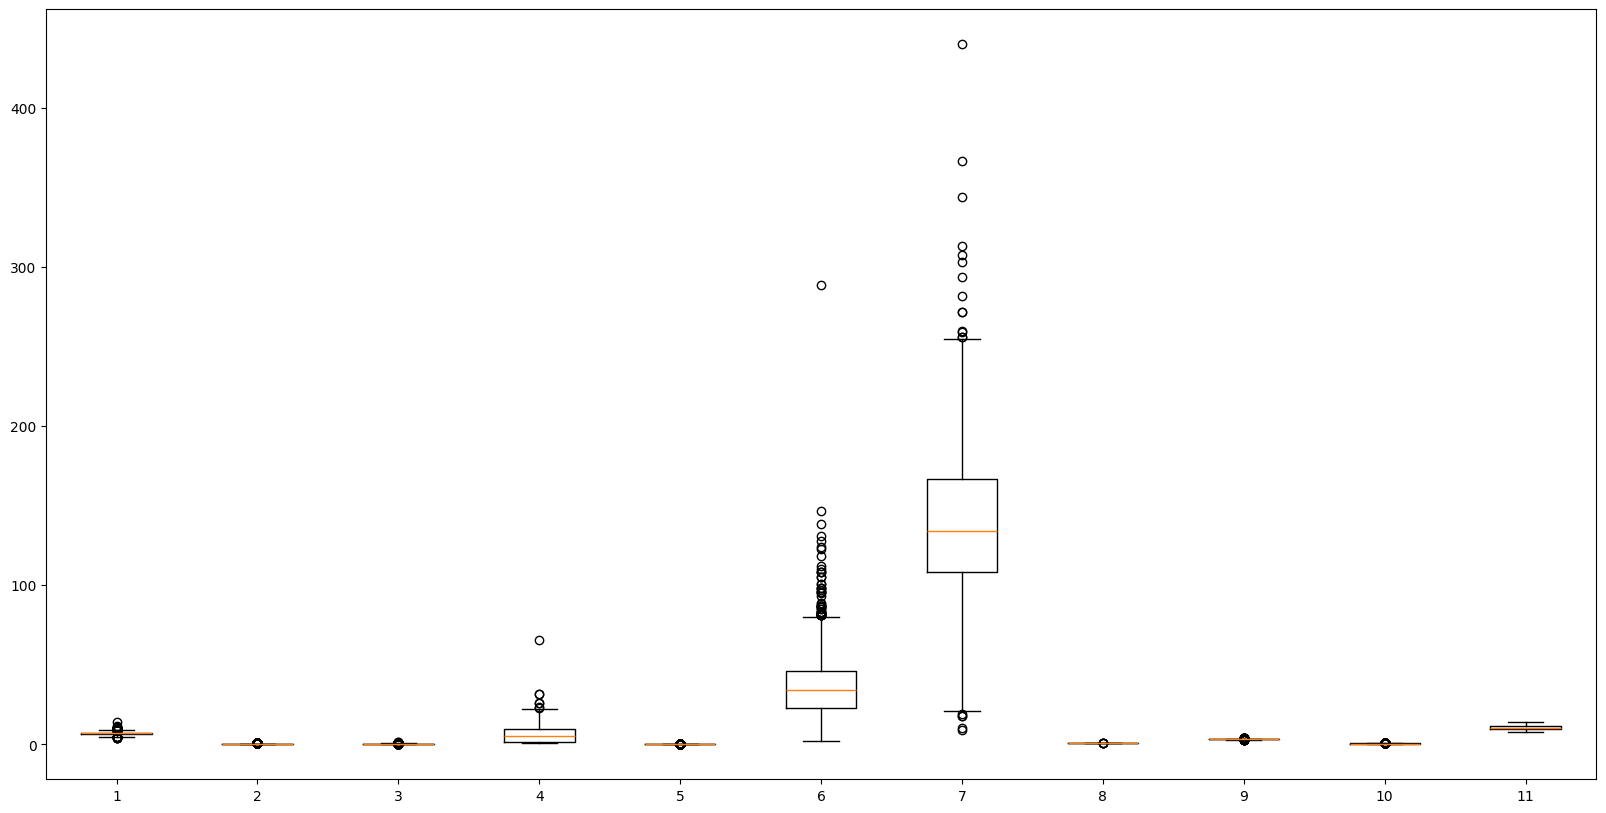

In [234]:
# Check outliers
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.boxplot(Wines)

## *Removing Outliers*

{'whiskers': [<matplotlib.lines.Line2D at 0x1df32a762c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df32aedff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df32a756f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1df32aee800>,
 'fliers': [<matplotlib.lines.Line2D at 0x1df32aee680>,
 'means': []}

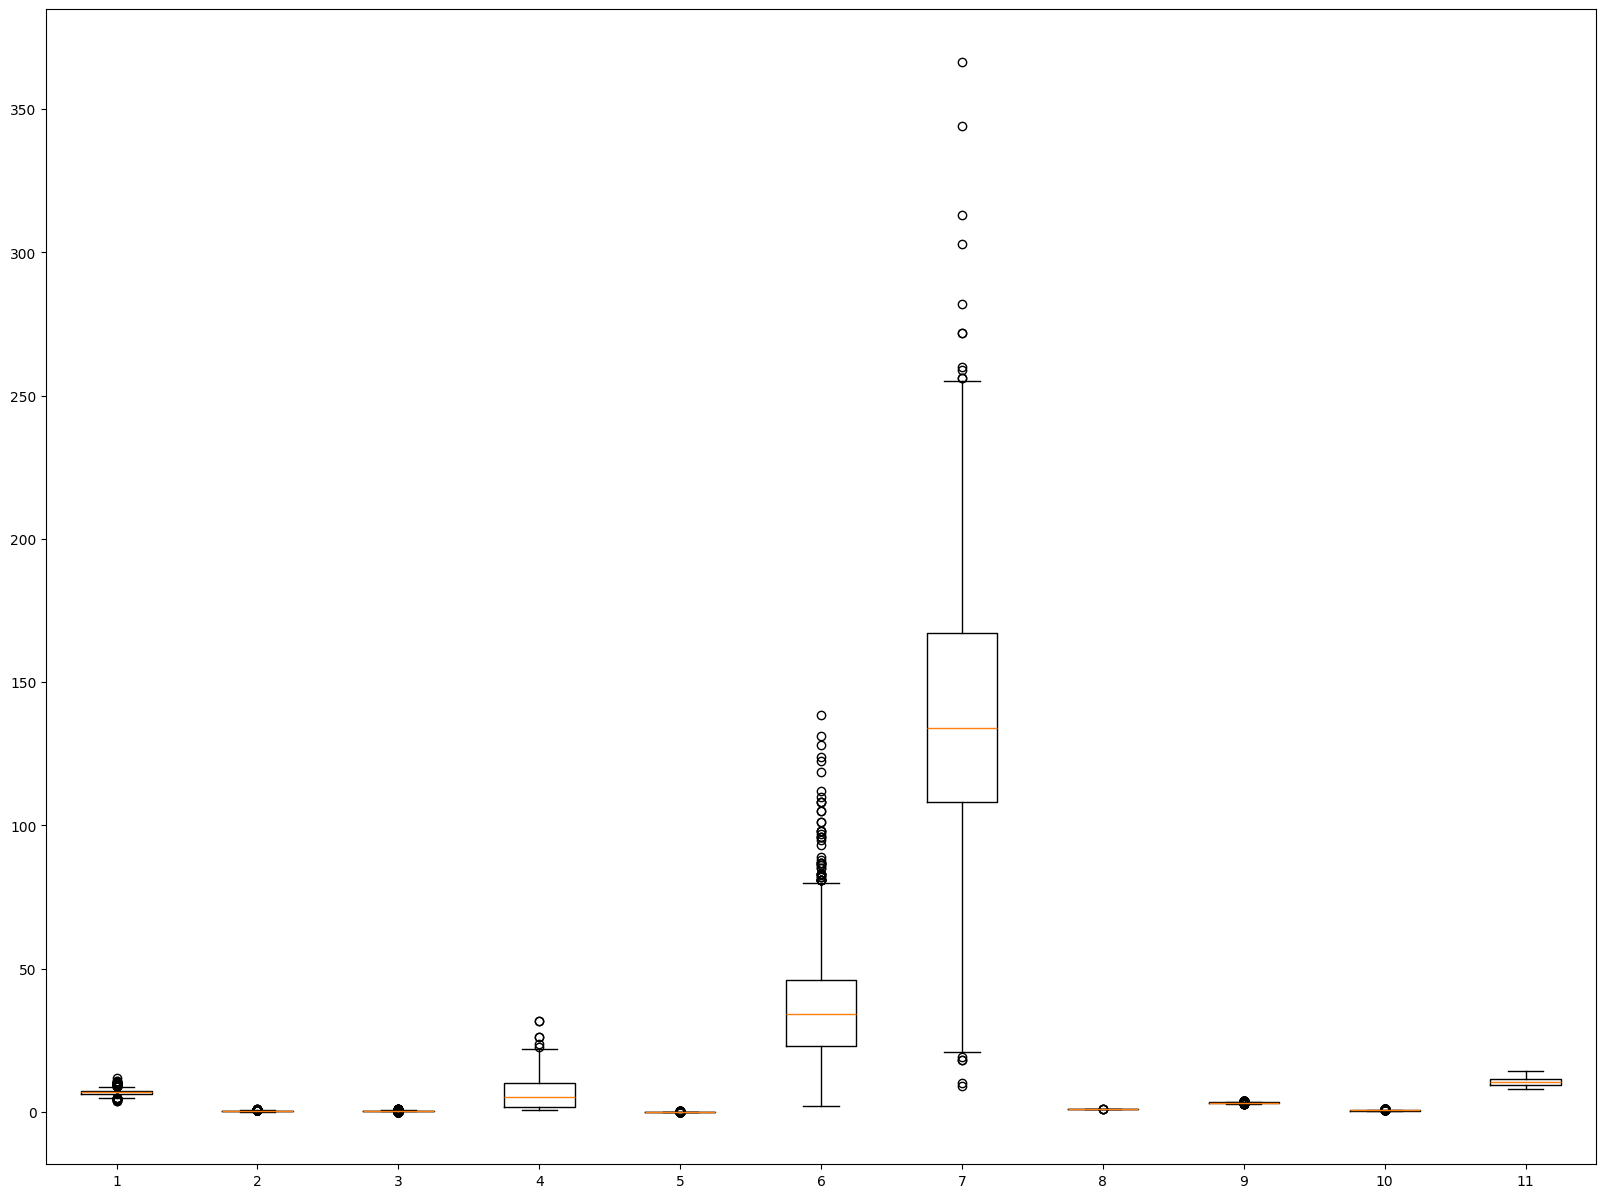

In [235]:
import numpy as np

def remove_outliers(data):
    df = data.copy()
    removed_indices = []

    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        removed_indices.extend(df.index[(df[str(col)] < lower_bound) | (df[str(col)] > upper_bound)])
        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]
    return df, removed_indices

Wines_wo_Outliers, removed_index = remove_outliers(Wines)
Target = Target[~np.isin(np.arange(len(Target)), removed_index)]

plt.figure(figsize=(20, 15))
plt.boxplot(Wines_wo_Outliers)

Here we remove all the previous outliers, that were shown by the boxplot, in order to get better results in the clustering.

## *Correlations*

In [236]:
Wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


## Some Plots to describe our Data

<Axes: xlabel='alcohol', ylabel='Count'>

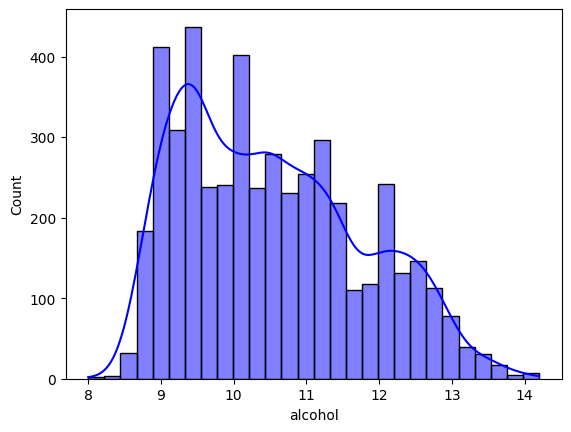

In [237]:
import seaborn as sns

sns.histplot(Wines_wo_Outliers['alcohol'], kde=True, color='blue')

<Axes: xlabel='volatile acidity', ylabel='Count'>

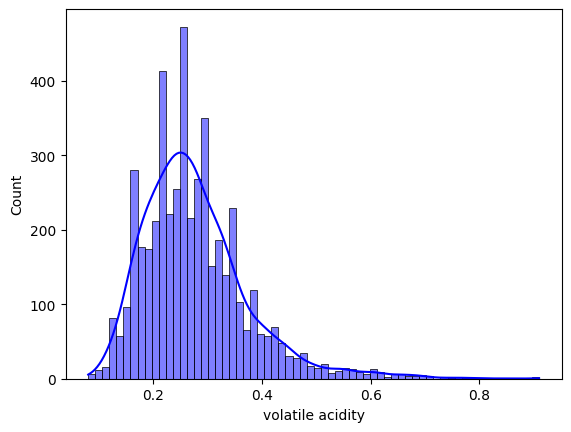

In [238]:
sns.histplot(Wines_wo_Outliers['volatile acidity'], kde=True, color='blue')

<Axes: xlabel='pH', ylabel='Count'>

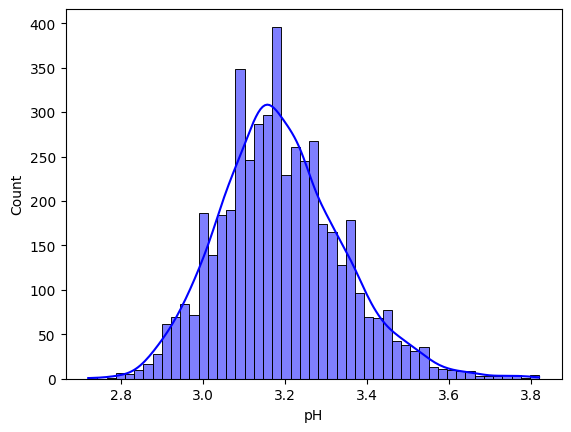

In [239]:
sns.histplot(Wines_wo_Outliers['pH'], kde=True, color='blue')

# ***Unsupervised Learning***

## *Scalling Data*

In [240]:
# Used Robust Scaler, because of the outliers
# Robust Scaler is robust to outliers
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
Wines_scaled = scaler.fit_transform(Wines_wo_Outliers)

Wines_scaled

array([[ 0.2       ,  0.09090909,  0.40909091, ..., -0.94736842,
        -0.14285714, -0.84210526],
       [-0.5       ,  0.36363636,  0.22727273, ...,  0.63157895,
         0.14285714, -0.47368421],
       [ 1.3       ,  0.18181818,  0.77272727, ...,  0.42105263,
        -0.21428571, -0.15789474],
       ...,
       [-0.3       , -0.18181818, -1.13636364, ..., -1.        ,
        -0.07142857, -0.52631579],
       [-1.3       ,  0.27272727, -0.13636364, ...,  0.84210526,
        -0.64285714,  1.26315789],
       [-0.8       , -0.45454545,  0.59090909, ...,  0.42105263,
        -1.07142857,  0.73684211]])

# *PCA Clustering*

In [241]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_wines = pca.fit_transform(Wines_scaled)

pca_wines

array([[-2.12659409, -0.39576499, -0.63633853, -0.28824235],
       [ 0.34609823, -0.35164992,  0.21699524,  0.06267625],
       [-0.56673311,  0.71576668, -0.48935992, -0.22560493],
       ...,
       [ 0.82308106, -0.4341092 , -0.68399882, -1.07257133],
       [ 2.72982108,  0.39876426,  0.45656746,  0.34542339],
       [ 2.07055515,  1.33317149,  0.4076468 , -0.32427516]])

In [242]:
pca.explained_variance_ratio_

array([0.25171822, 0.17583737, 0.13123885, 0.10337781])

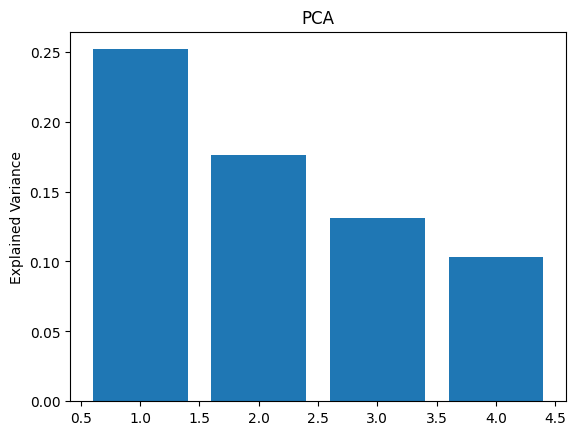

In [243]:
from matplotlib import pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('PCA')
plt.ylabel('Explained Variance')

plt.show()

## *Performing K-means clustering*

In [244]:
num_linhas_df, num_colunas_df = Wines.shape

num_linhas_df, num_colunas_df

(4898, 11)

In [245]:
Target.shape

(4810,)

In [246]:
from sklearn.cluster import KMeans

k = 4
kmeans_wines = KMeans(n_clusters=k, max_iter=1000, n_init=10, random_state=42)
kmeans_wines.fit(Wines_scaled)
labels = kmeans_wines.labels_
centroids = kmeans_wines.cluster_centers_

crosstab = pd.crosstab(labels, Target, rownames=['clusters'])
print(crosstab)

col_0     3   4    5    6    7   8  9
clusters                             
0         3  41  227  653  427  87  2
1         6  53  299  606  286  63  3
2         7  41  579  609  111  19  0
3         1  22  314  291   54   6  0


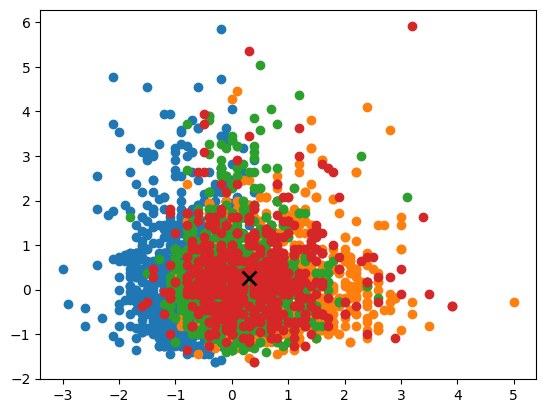

In [248]:
from matplotlib import pyplot as plt
import numpy as np

k = 4
for i in range(k):
    ds = Wines_scaled[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1], 'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=10.0)
    plt.setp(lines,mew=2.0)

plt.show()

From the result of the crosstab and the plot we can see that our Kmeans model is too weak and we need to improve it. 
To make that happens lets use some methods to see how much clusters we need to use.

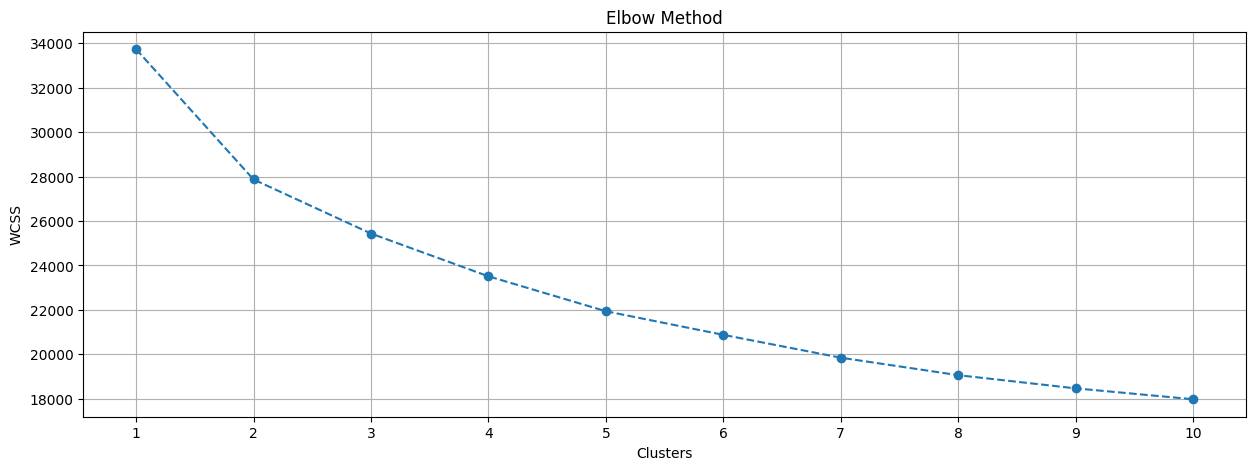

In [249]:
# Lets use methods to see how much clusters to use
# Elbow Method
from sklearn.cluster  import KMeans
from matplotlib import pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(Wines_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (15, 5))
plt.plot(range(1,11), wcss, marker = 'o', linestyle='--')
plt.title('Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Clusters')
plt.xticks(range(1,11))
plt.grid(True)

plt.show()

In this plot (Elbow method), we can see that the right number of clusters is 3 or 4. Therefore, the best thing to do is to create a new plot with another method, for example, **Silhouette method*, to make sure of the number of clusters we should actually use.

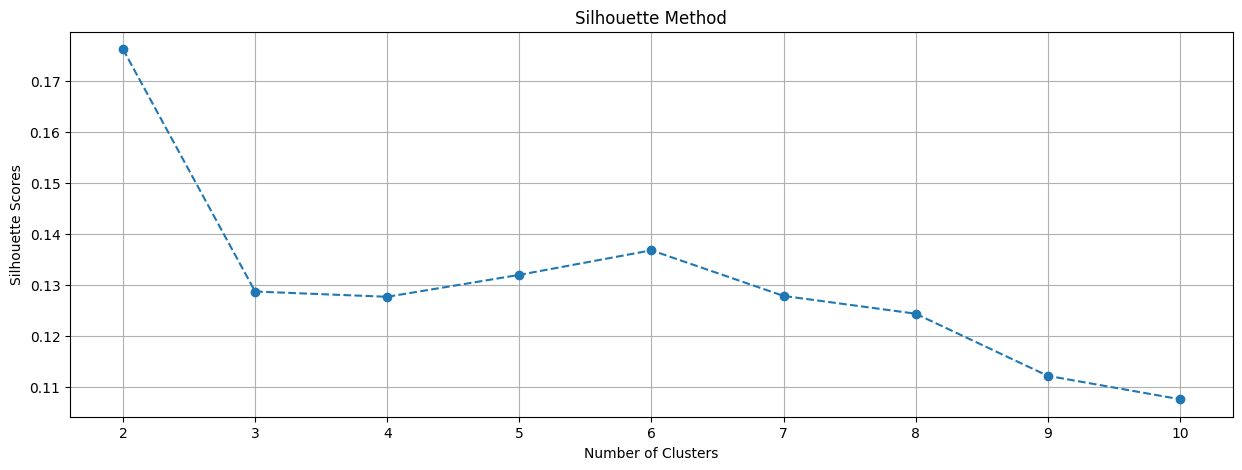

In [250]:
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

silhouette_scores = []

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_label = kmeans.fit_predict(Wines_scaled)
    silhoutte_avg = silhouette_score(Wines_scaled, cluster_label)
    silhouette_scores.append(silhoutte_avg)

plt.figure(figsize=(15,5))
plt.plot(range(2,11), silhouette_scores, marker='o', linestyle="--")
plt.title('Silhouette Method')
plt.ylabel('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.xticks(range(2,11))
plt.grid(True)

plt.show()

From this method, we can see that 2 clusters is the correct number because it suggests that most of the samples are well separated within their clusters and are relatively distant from the other clusters.

But on the other hand, we see that the elbow method has indicated a number of clusters equivalent to 3 or 4, which suggests that the best options at the moment are 2, 3 or 4.

We need to clarify the number of clusters, so lets try another method, for example, **Max Information Gain Method**.

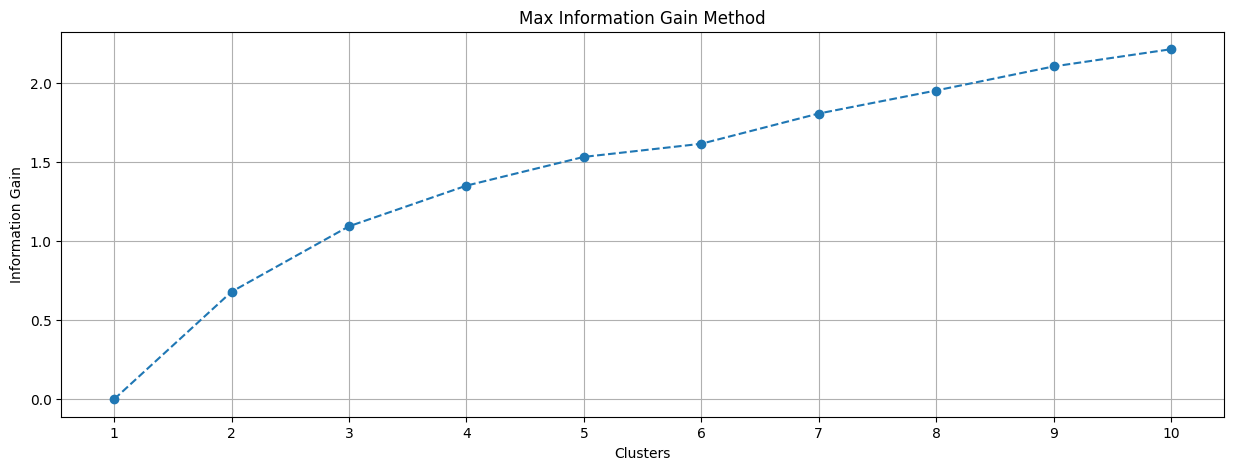

In [251]:
from sklearn.metrics import mutual_info_score

def max_information_gain(data):
    information_gain = []

    for n_cluster in range(1,11):
        kmeans = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        labels =kmeans.labels_
        mi = mutual_info_score(labels, labels)
        information_gain.append(mi)
    
    return information_gain

if __name__ == '__main__':
    information_gains = max_information_gain(Wines_scaled)

    plt.figure(figsize=(15,5))
    plt.plot(range(1,11), information_gains, marker='o', linestyle='--')
    plt.title('Max Information Gain Method')
    plt.xlabel('Clusters')
    plt.ylabel('Information Gain')
    plt.xticks(range(1,11))
    plt.grid(True)

    plt.show()

As we can see, this method shows that the perfect number of clusters is 10. Since we can't reach any conclusions with these 3 methods, we'll use 7 clusters, since the data tells us that the variable in question (quality) has 7 values that are between 3 and 9.

In [252]:
kmeans_final = KMeans(n_clusters=7, max_iter=1000, n_init=10, random_state=42)
kmeans_final.fit(Wines_scaled)
final_labels = kmeans_final.labels_
final_centroids = kmeans_final.cluster_centers_

crosstab = pd.crosstab(final_labels, Target, rownames=['clusters'])
print(crosstab)

col_0     3   4    5    6    7   8  9
clusters                             
0         5  39  255  365  128  16  1
1         0   8   64   36    2   2  0
2         2  18  154  458  228  39  0
3         3  13   76  435  343  76  4
4         5  15  446  542   99  21  0
5         2  16  243  195   29   4  0
6         0  48  181  128   49  17  0


# ***Supervised Learning***

Here we're going to build a predictive model, to predict the quality of a wine if we give the model certain variables.

So lets split the data first.

## *Spliting Data*

In [253]:
from sklearn.model_selection import train_test_split

X = Wines_scaled
y = Target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3367, 11), (3367,), (1443, 11), (1443,))

Lets create our predictive model. We are working with Categorical data, so we are dealing with classification problem.

So lets try the **Random Forest Classifier model** first

## *Classification Model*

In [254]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_pred

array(['6', '7', '5', ..., '6', '6', '6'], dtype=object)

Now that we got our predictions. Lets evaluate our model.

For that, lets use the **Accuracy score** metric to evaluate our predictive model.

In [255]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6735966735966736

Our accuracy is too high, so we can conclude that our model is really good. But let's make sure that's the right call. For that, let's use more metrics to evaluate the model.

We already got **accuracy_score**, so let's use now **classification_report**

In [256]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.73      0.16      0.26        51
           5       0.72      0.70      0.71       440
           6       0.64      0.79      0.71       626
           7       0.69      0.52      0.60       266
           8       0.95      0.35      0.51        52
           9       0.00      0.00      0.00         2

    accuracy                           0.67      1443
   macro avg       0.53      0.36      0.40      1443
weighted avg       0.68      0.67      0.66      1443



c:\Users\diogo\miniconda3\envs\ML_ADS\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diogo\miniconda3\envs\ML_ADS\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diogo\miniconda3\envs\ML_ADS\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We can see that the precision, that in number since 4 to 9 the model is predicting really well. But on 3, we can see that the precision is the worst. We can say, that the dataset, has less values with that number than the rest, and so he is predicting more, the numbers between 4 and 9.

Since both metrics, return the same accuracy and that accuracy is good, we can say that our model, is good too, and its ready to predict.